# Calculo de resistencias con uncertanties

In [ ]:
pip install uncertainties


In [ ]:
import uncertainties as u
from uncertainties import unumpy

In [ ]:
#CALCULO R2

r2_0 = u.ufloat(8.01, 0.02)
r2_1 = u.ufloat(38.2, 0.1)
r2_3 = u.ufloat(8.9, 0.01)

R2 = r2_0 + r2_1 + r2_3

In [ ]:
R1 = u.ufloat(30, 0.5)*1000 #OHMS
R2 = R2 * 1000000 #OHMS
R3 = u.ufloat(55.6, 0.2)*1000 #OHMS
R4 = u.ufloat(15, 0.01)*1000 #OHMS

A= R4**(-1)
B = (R3 + R2) /R3  #factor por el cual multiplicar Vrv


# Ej plot

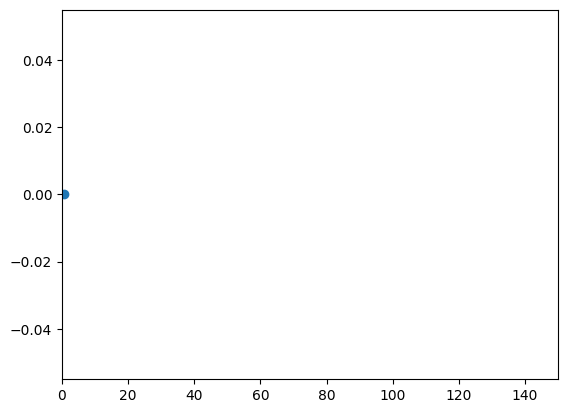

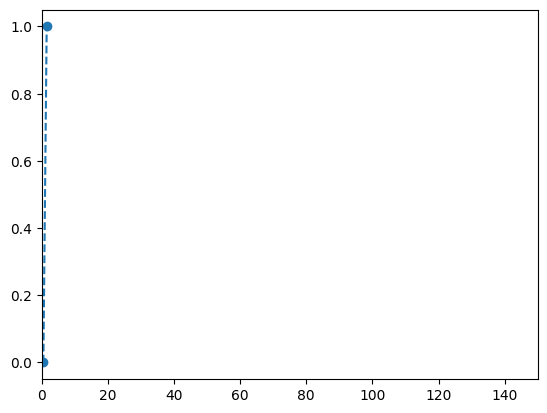

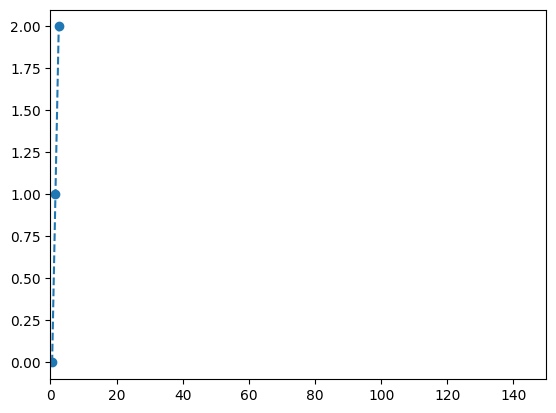

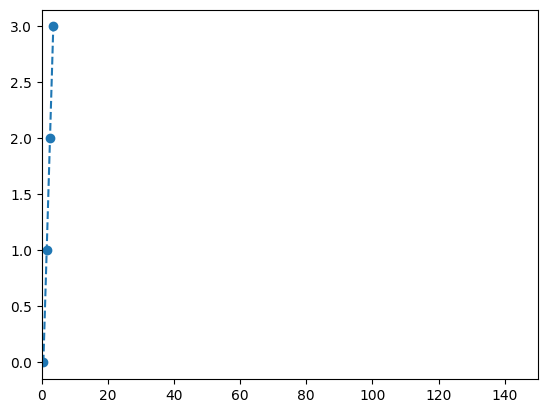

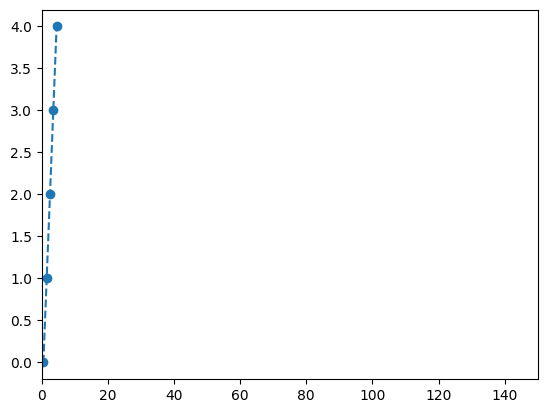

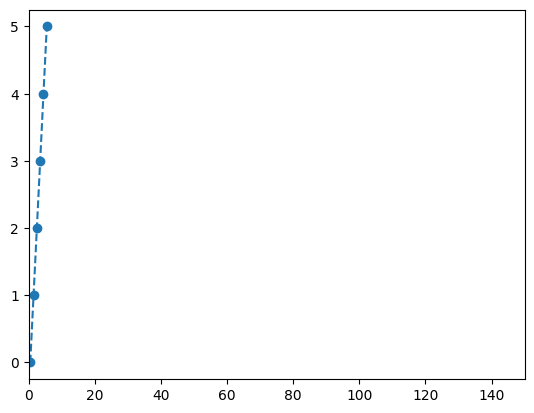

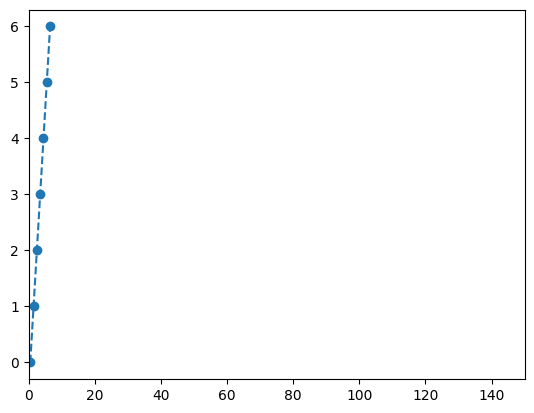

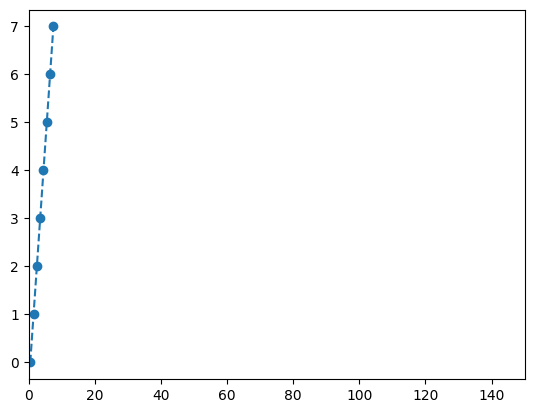

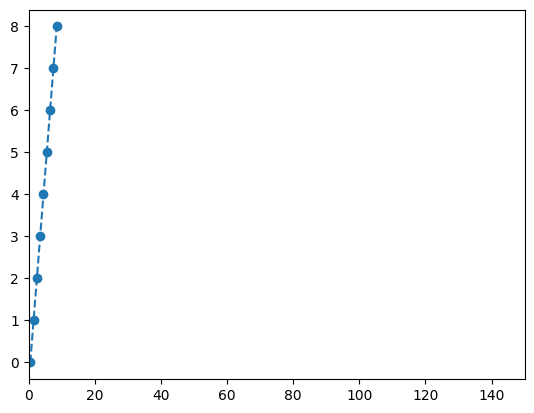

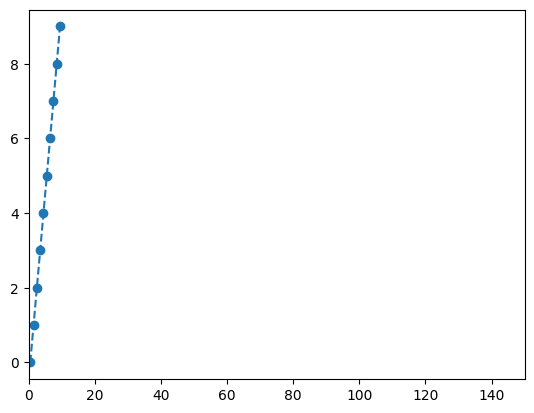

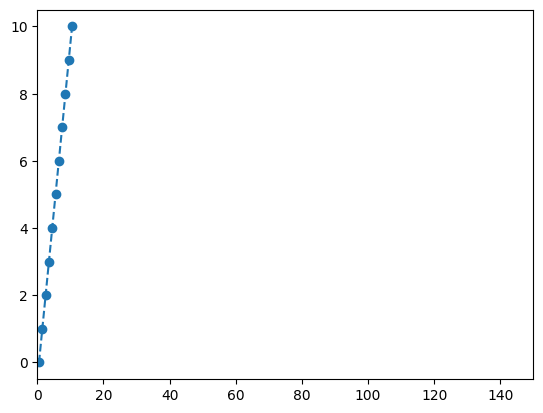

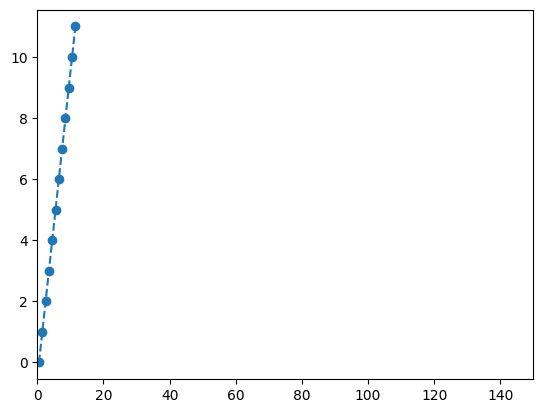

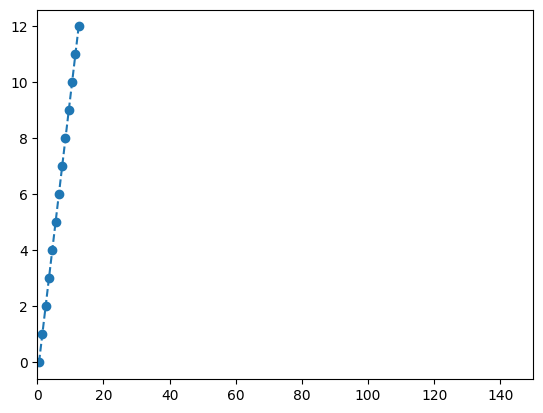

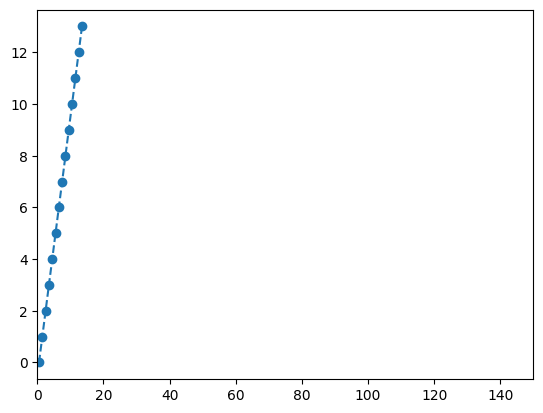

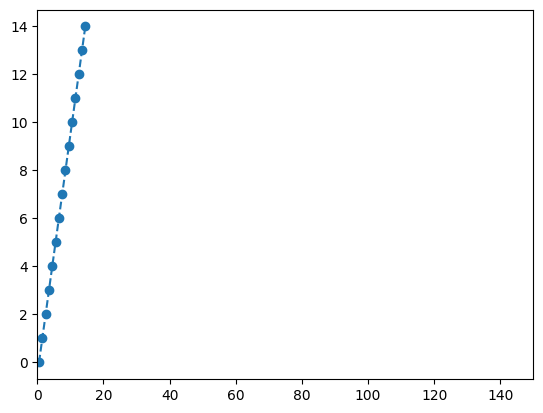

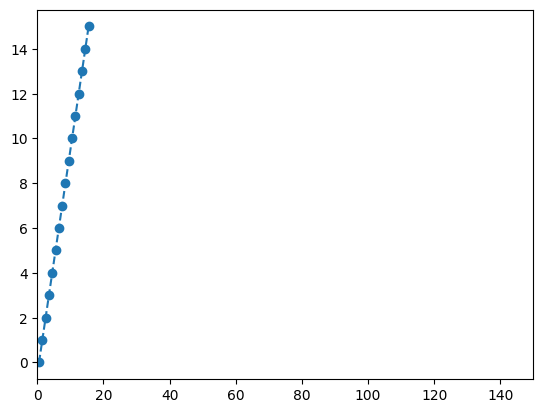

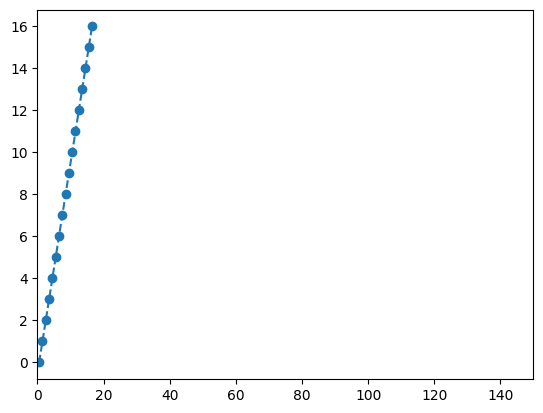

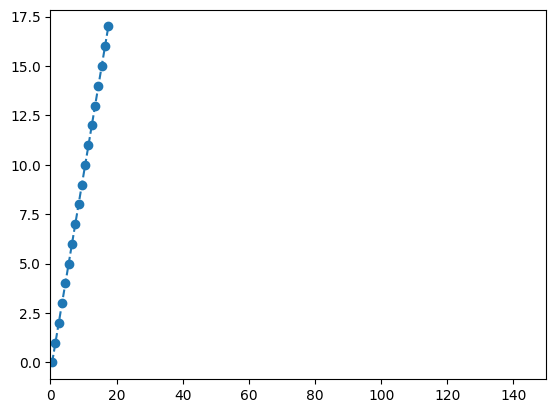

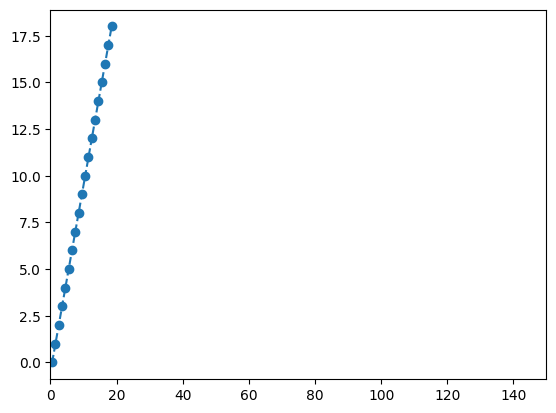

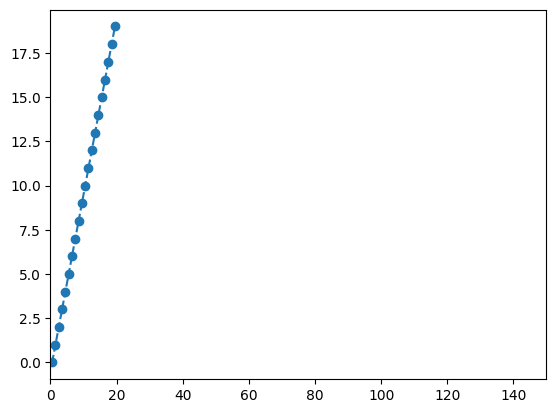

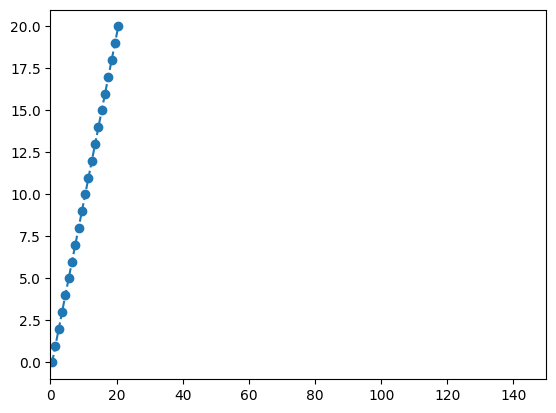

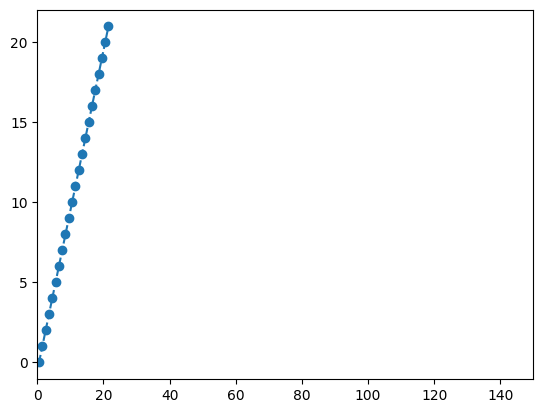

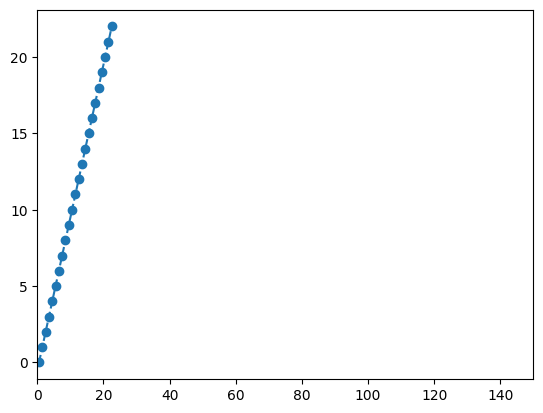

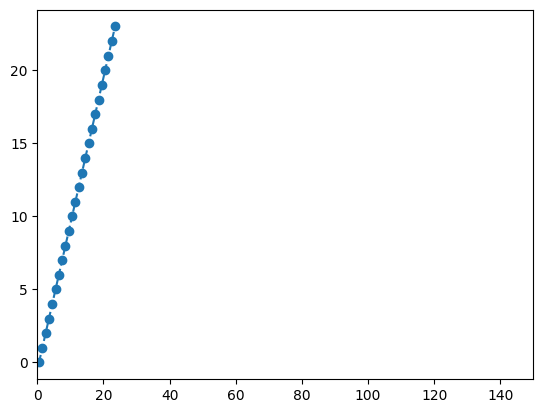

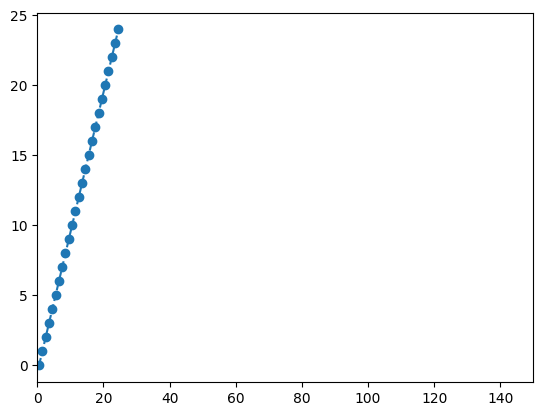

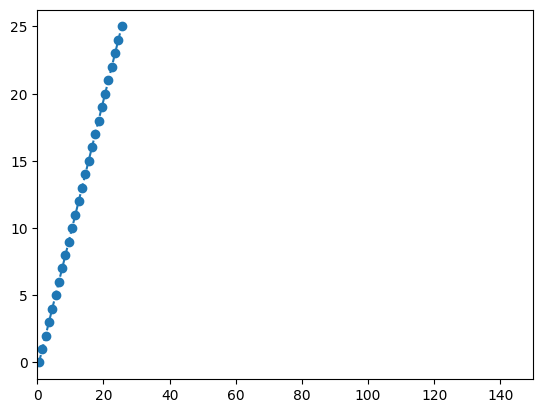

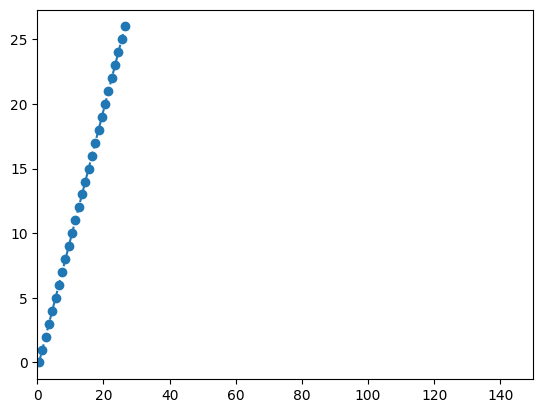

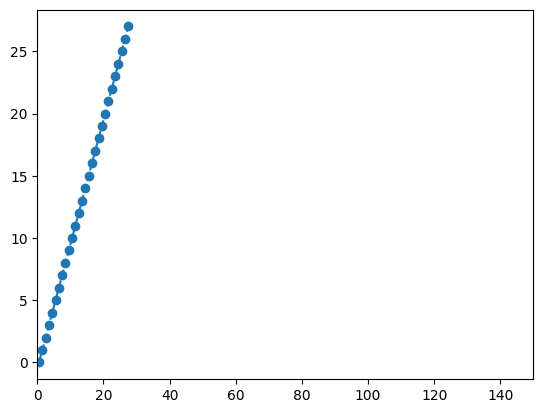

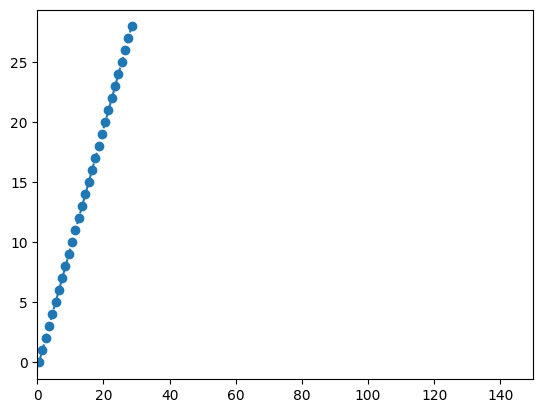

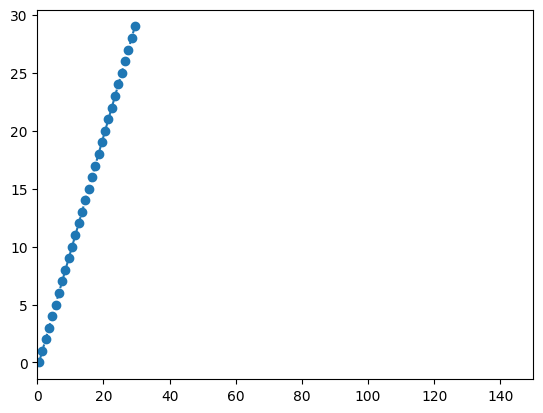

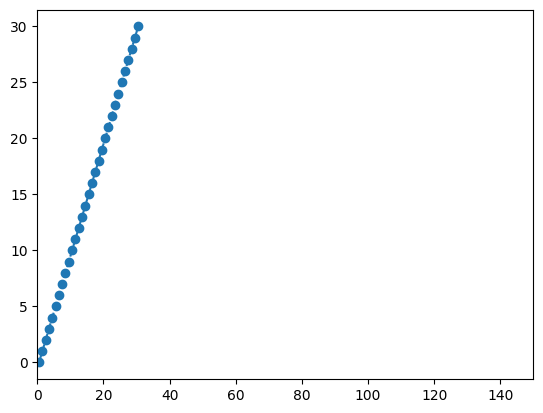

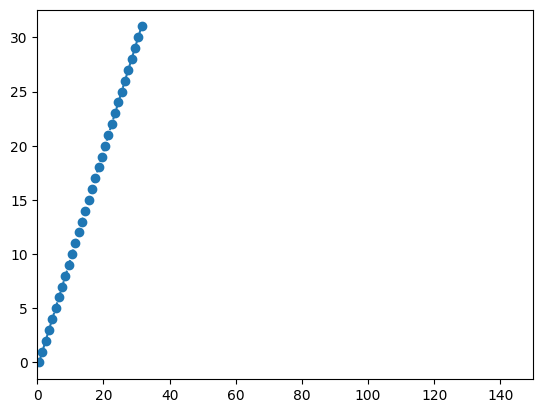

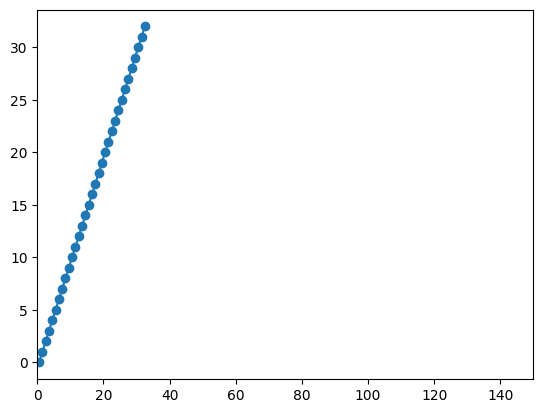

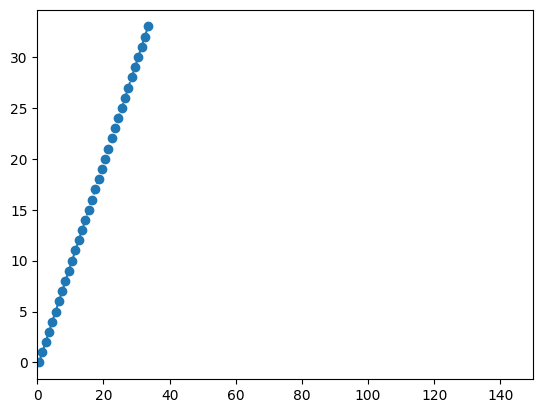

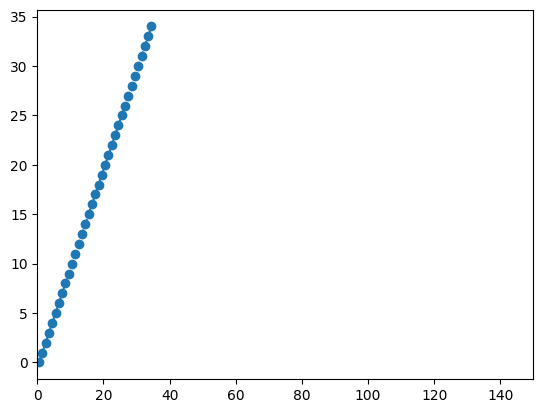

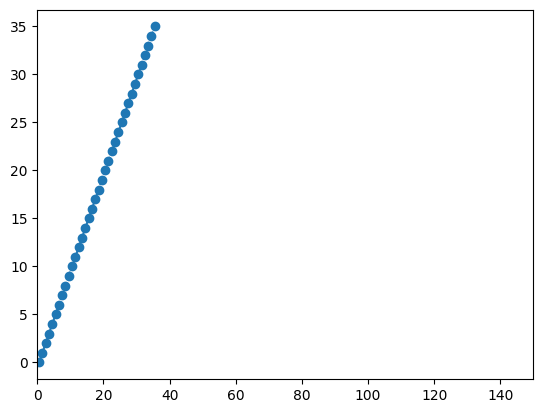

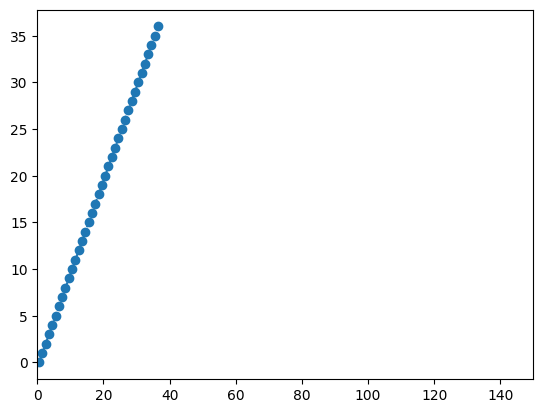

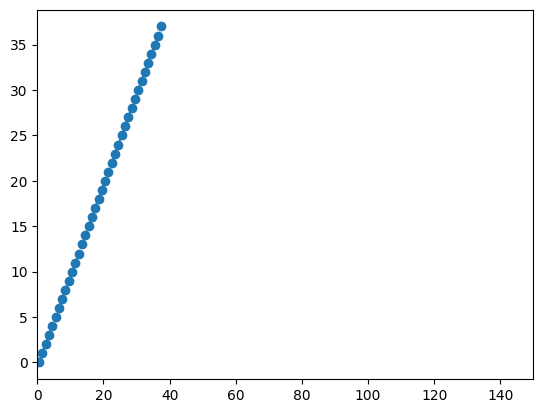

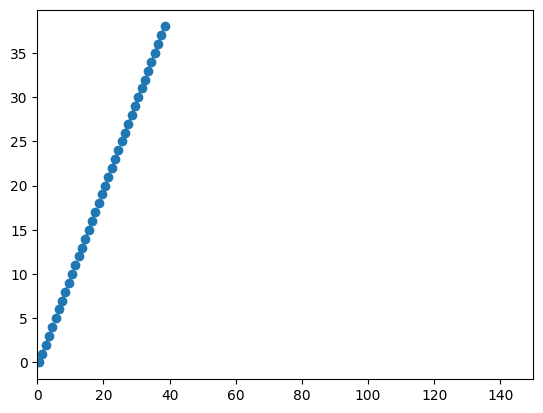

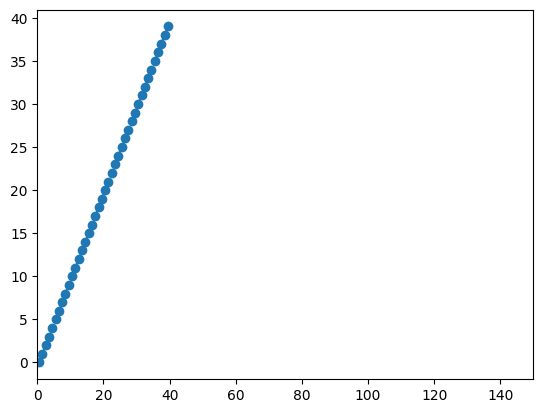

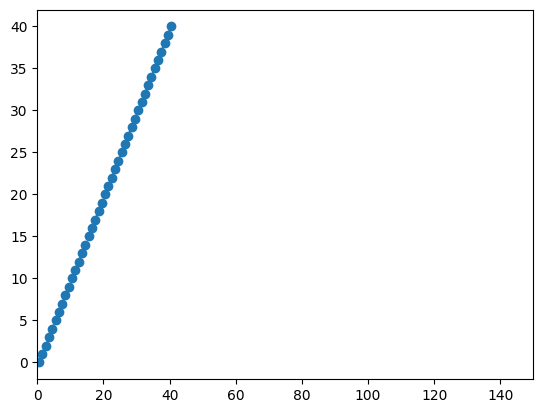

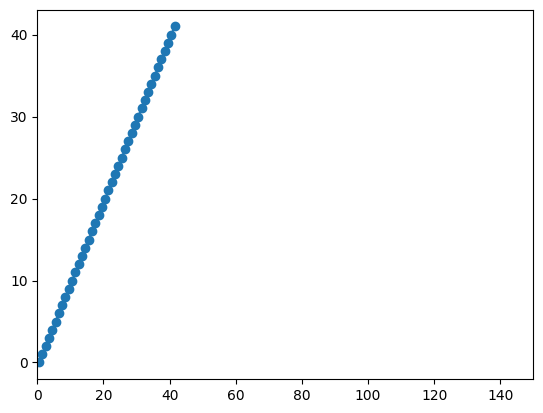

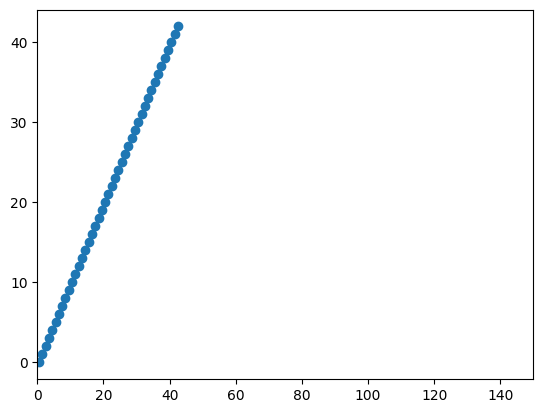

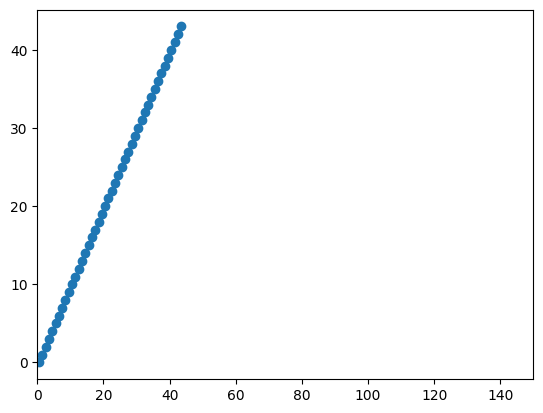

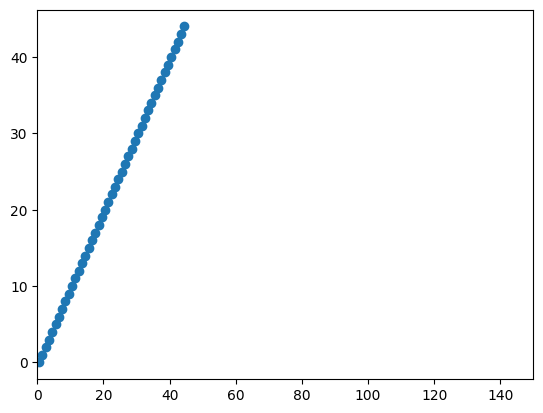

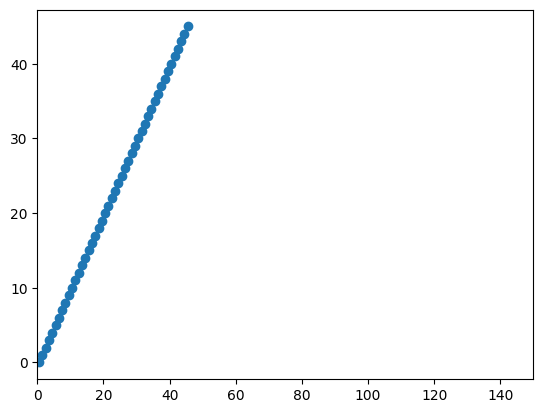

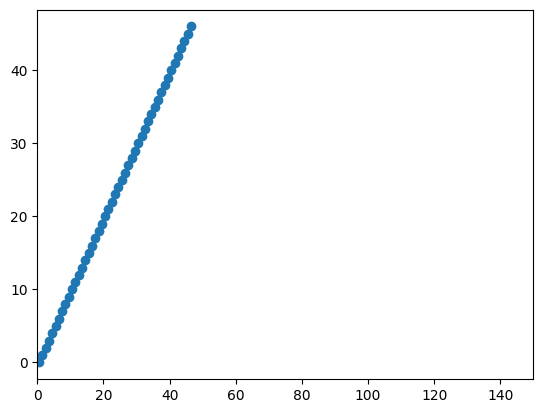

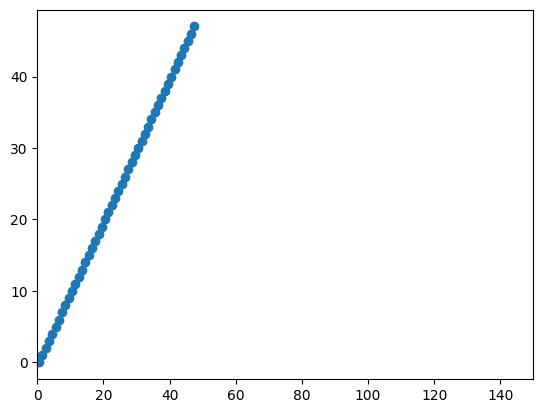

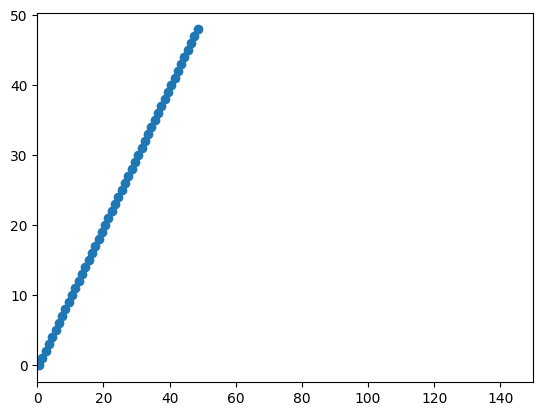

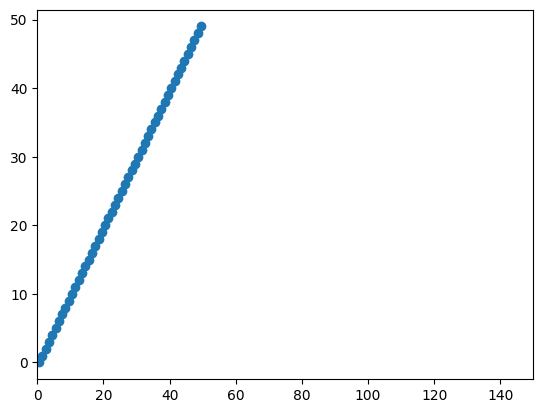

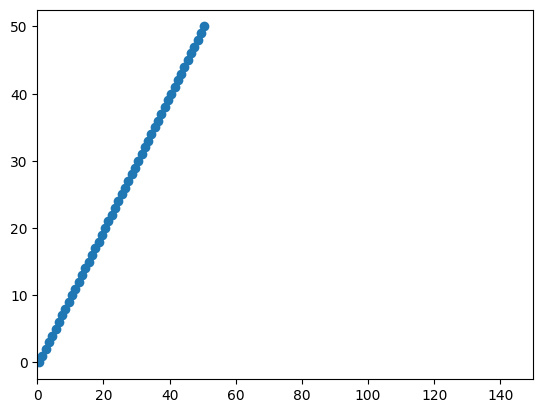

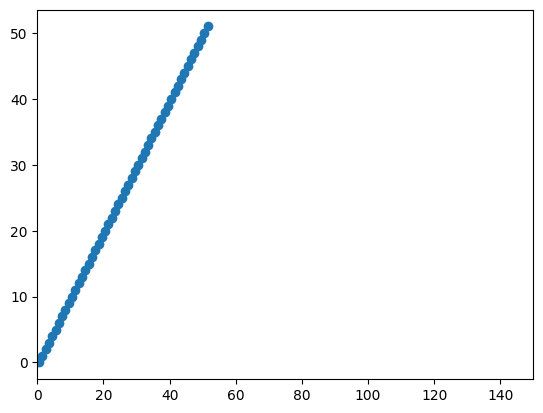

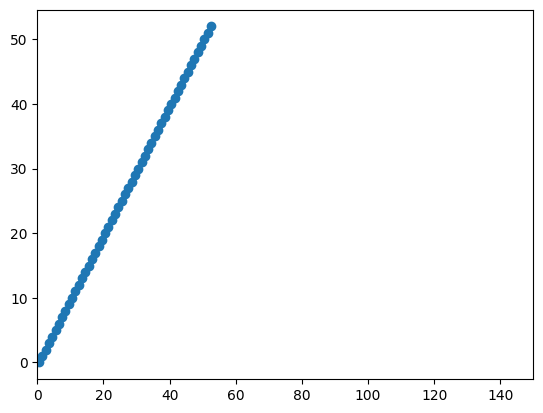

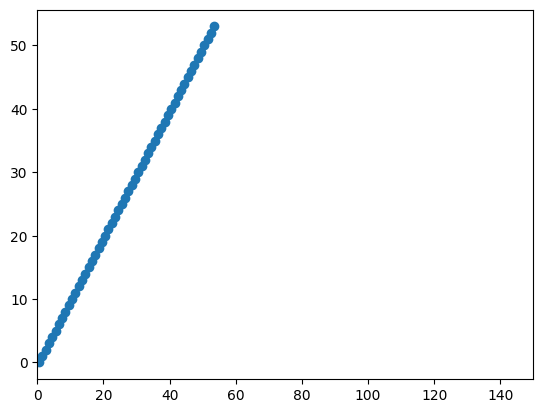

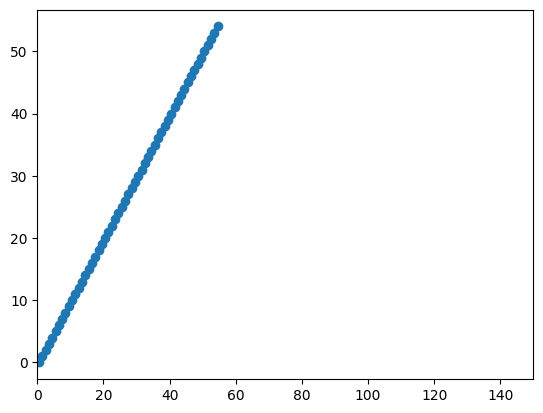

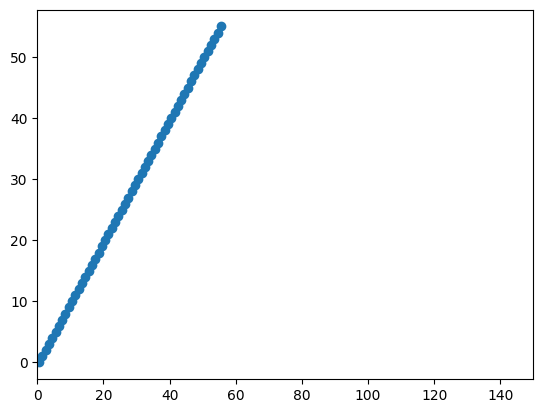

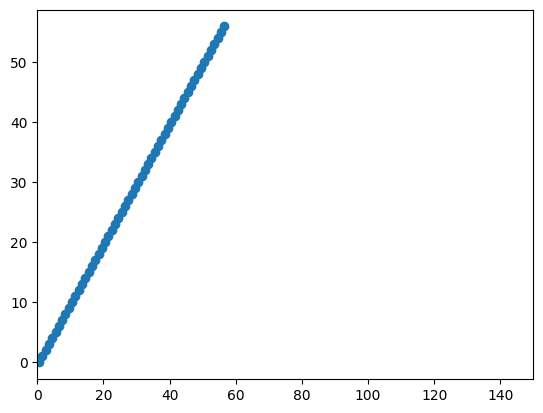

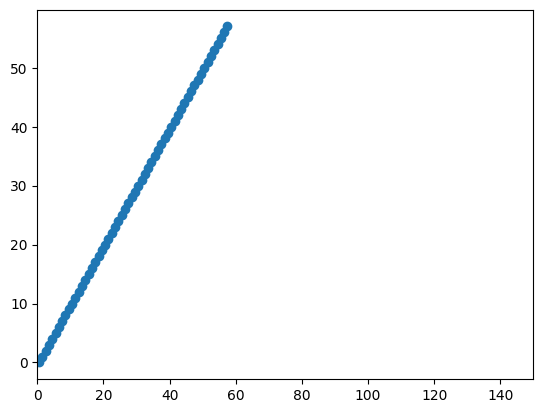

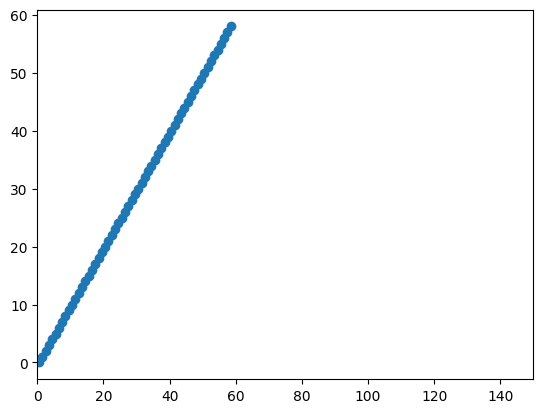

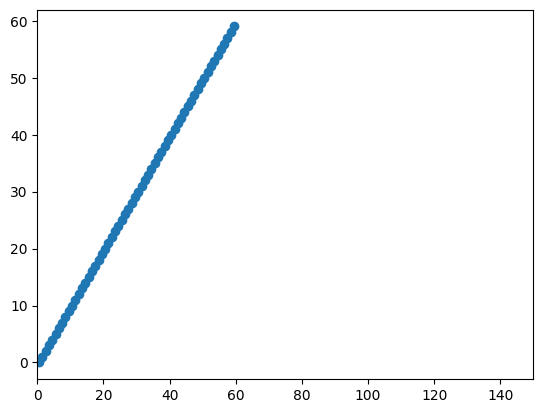

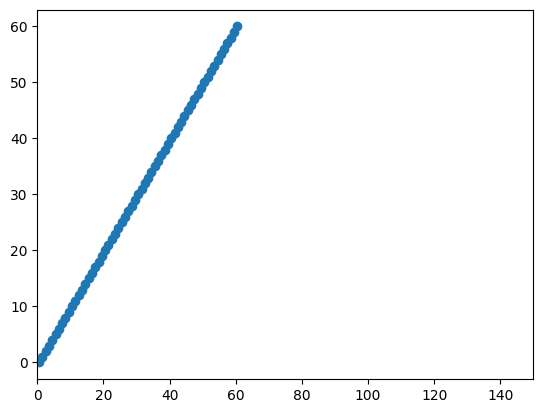

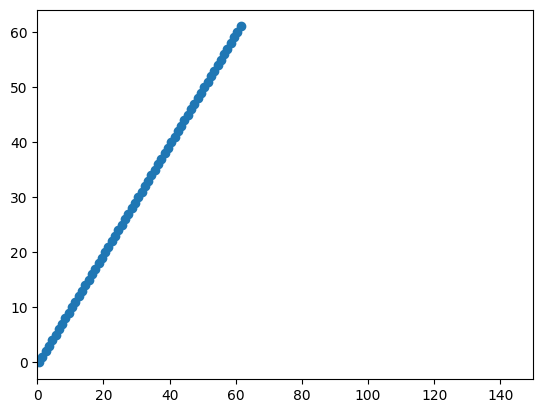

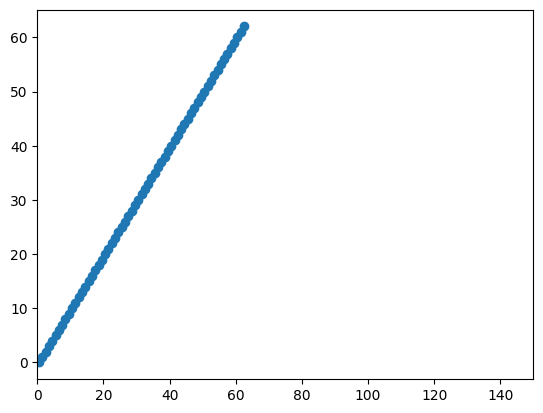

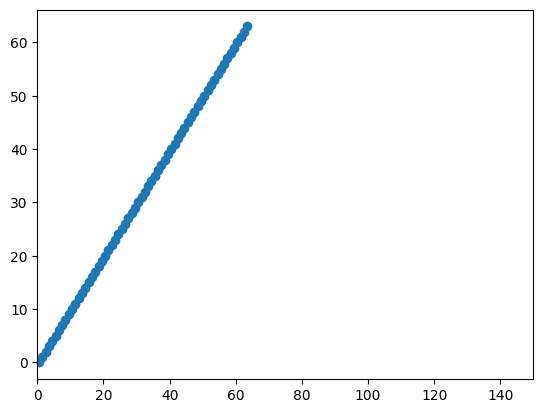

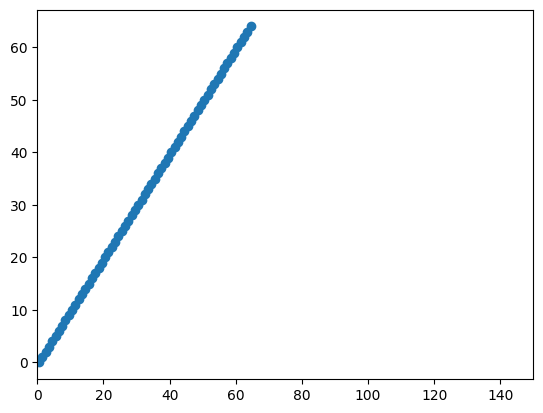

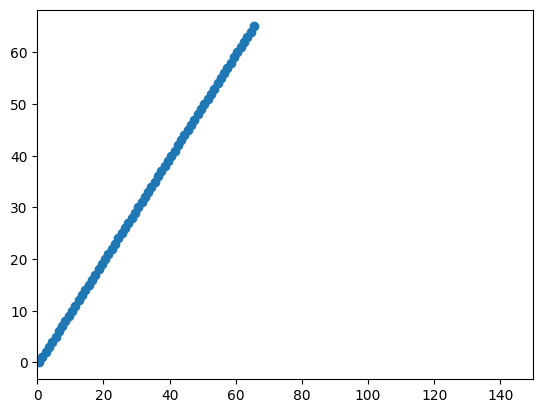

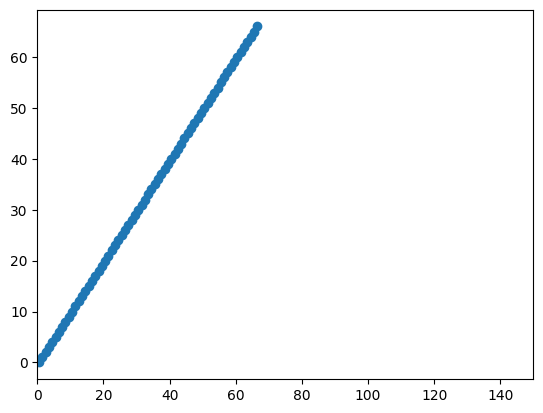

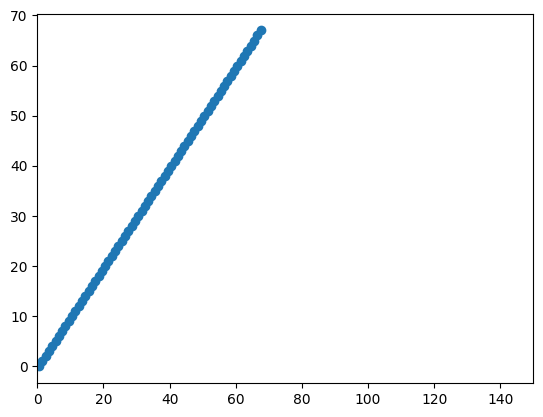

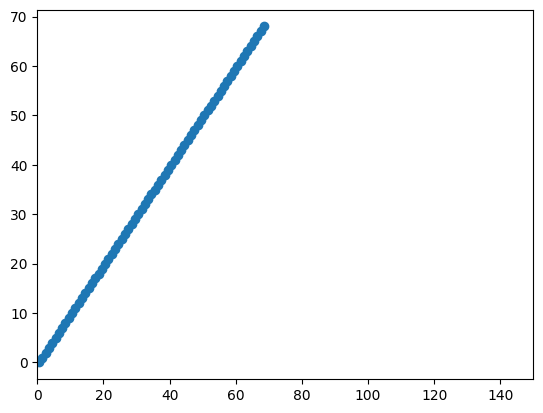

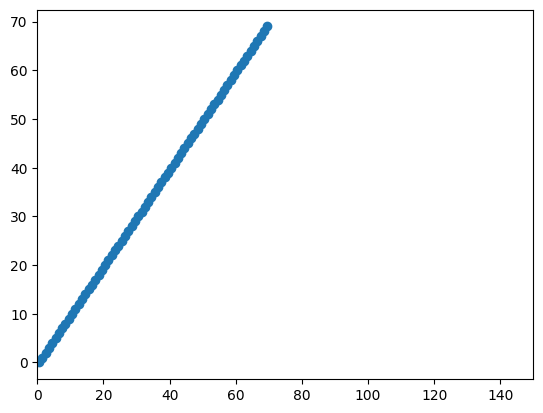

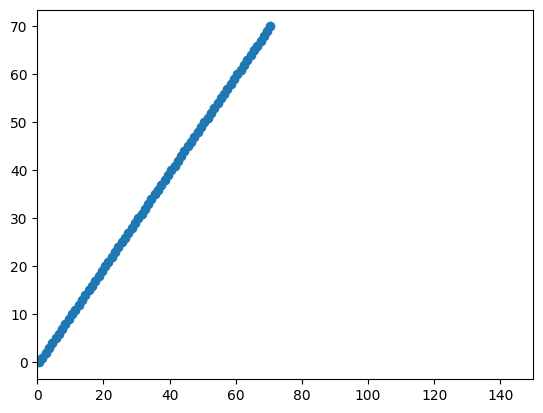

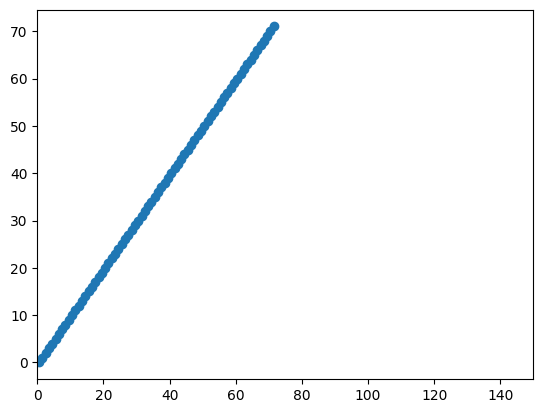

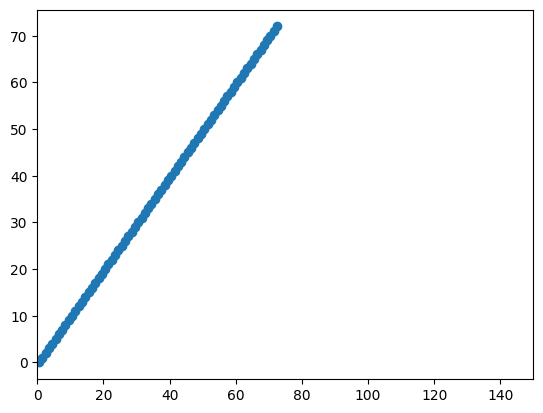

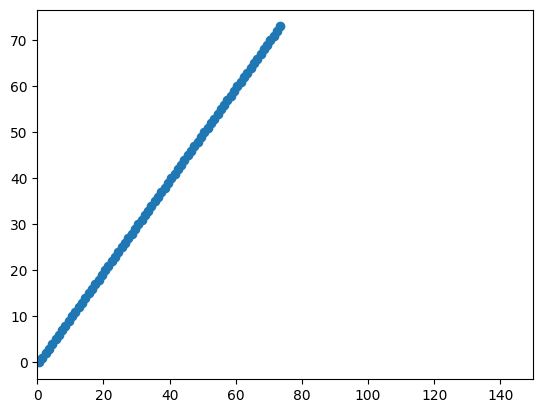

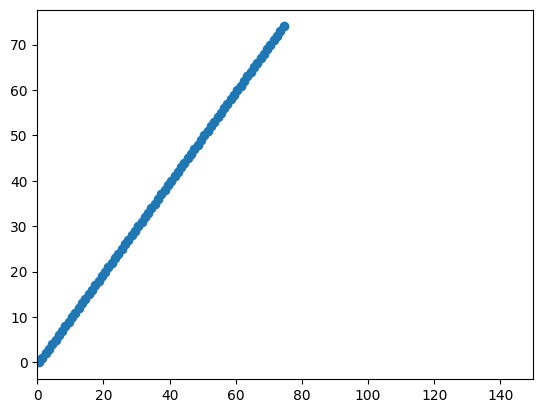

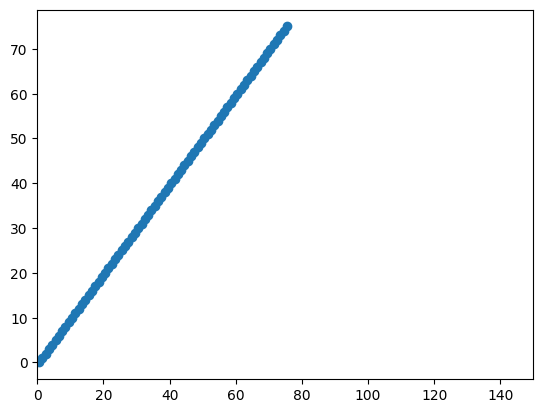

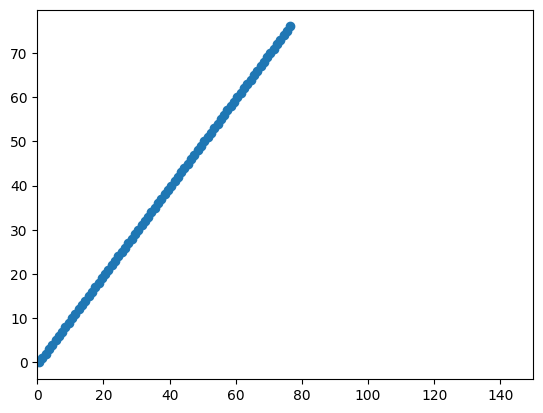

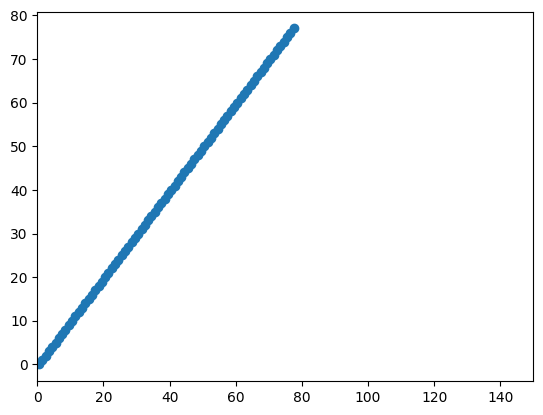

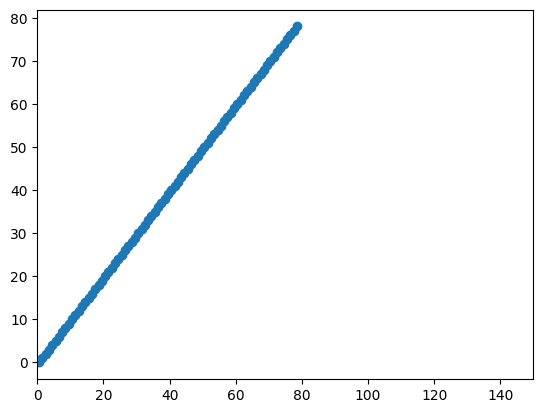

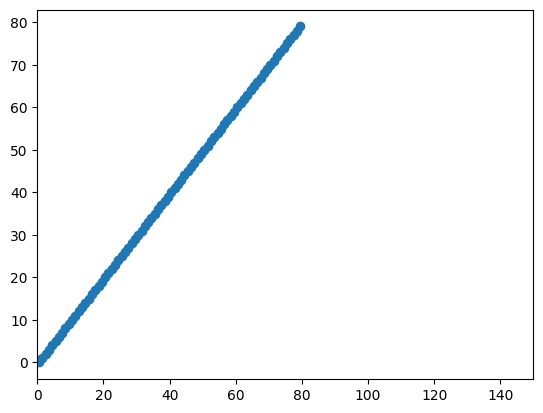

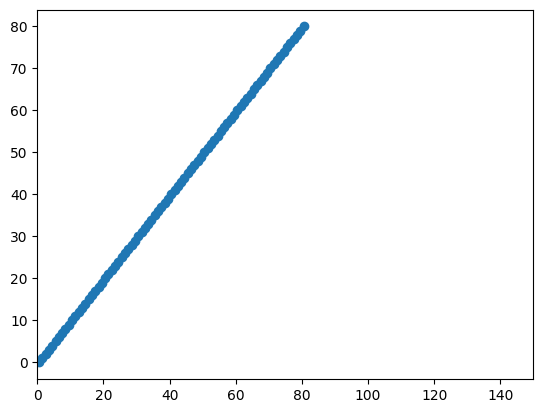

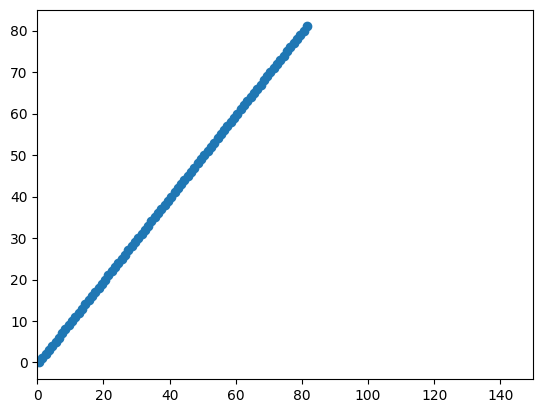

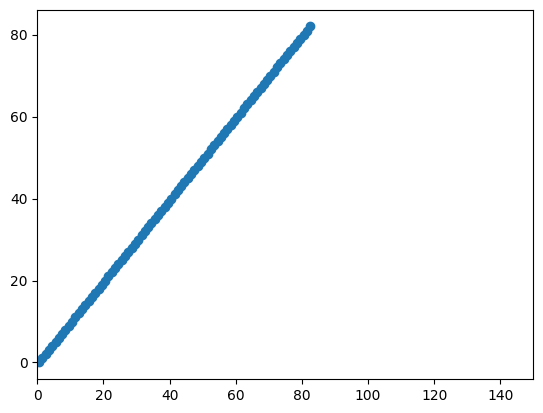

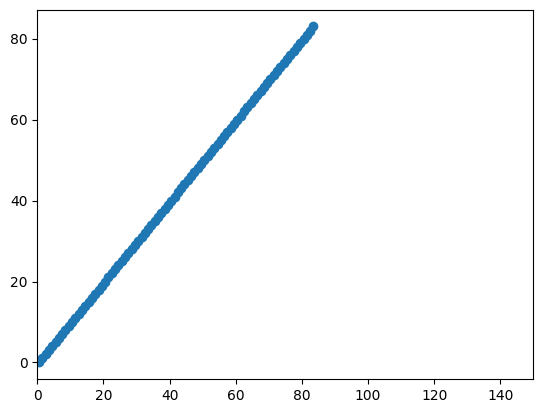

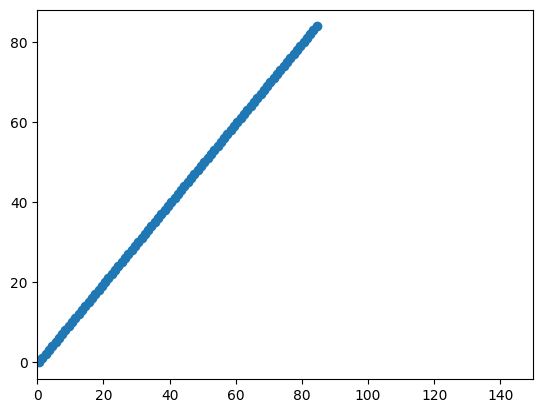

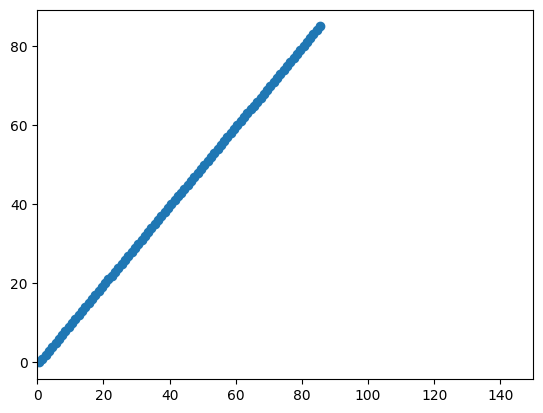

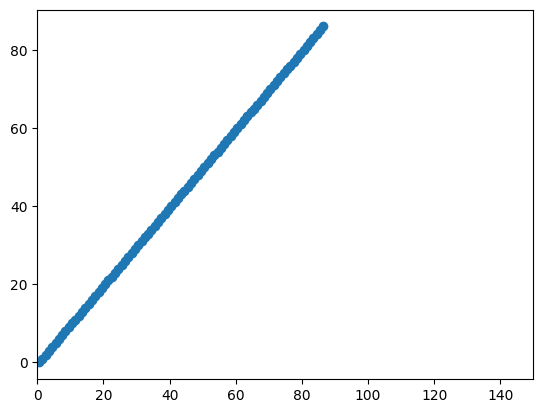

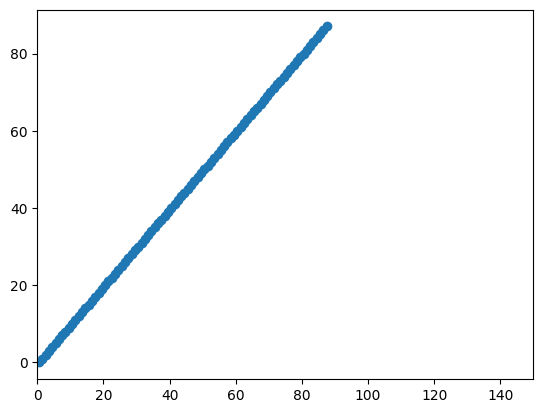

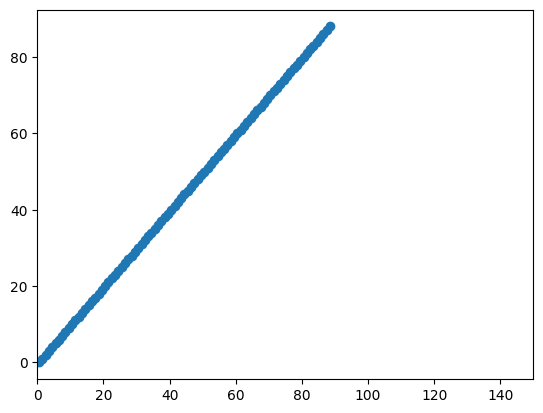

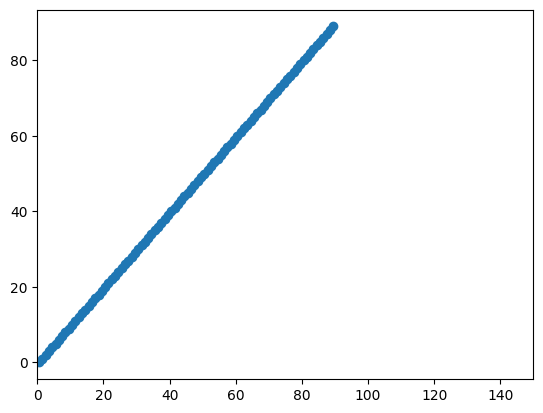

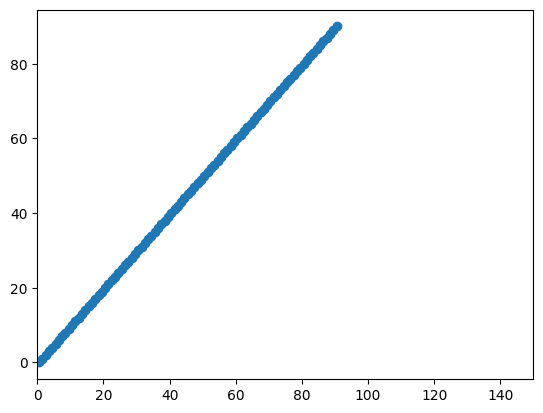

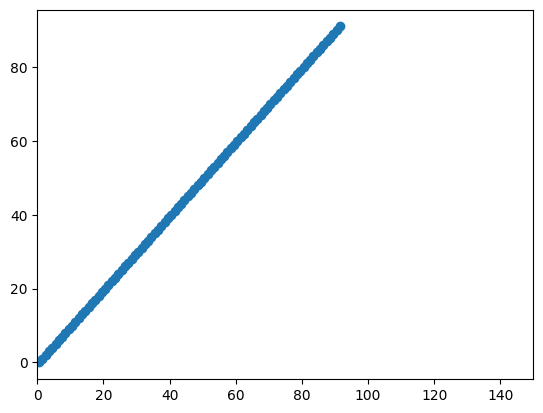

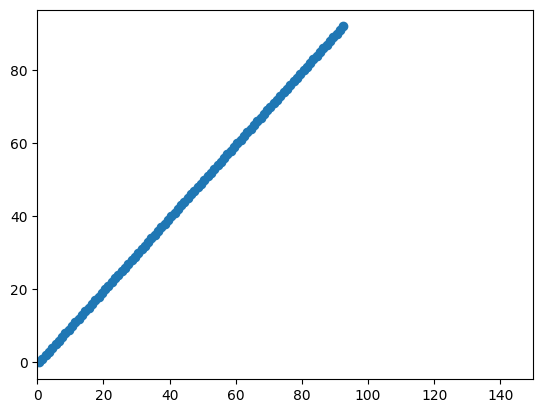

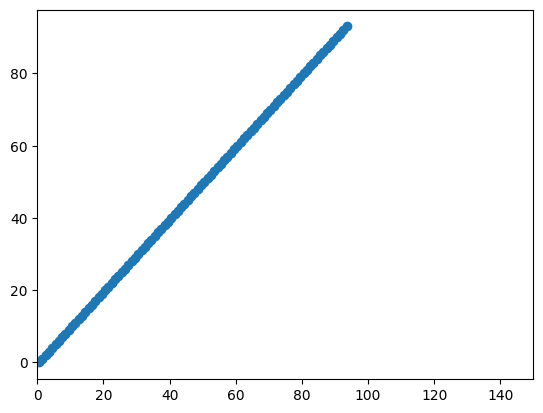

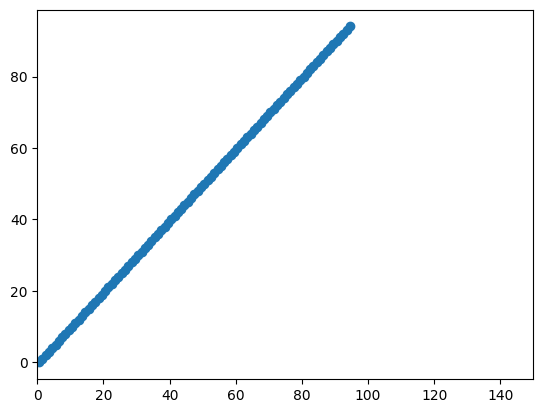

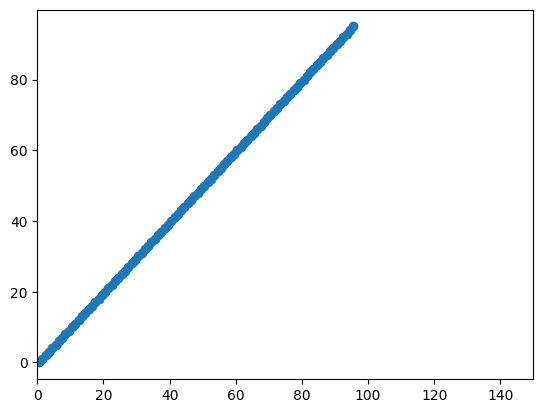

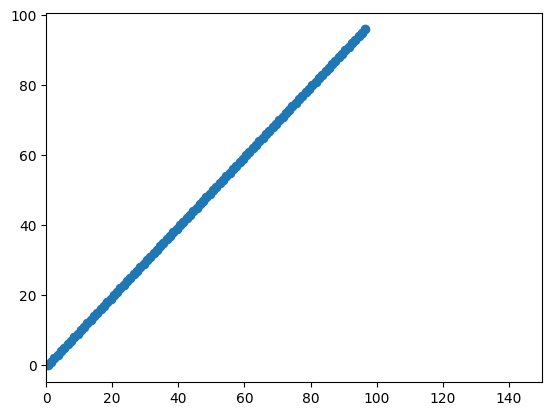

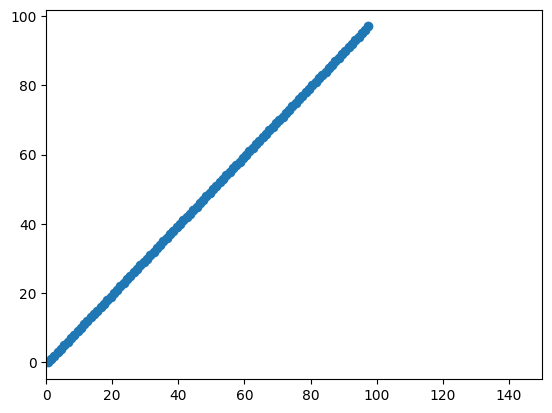

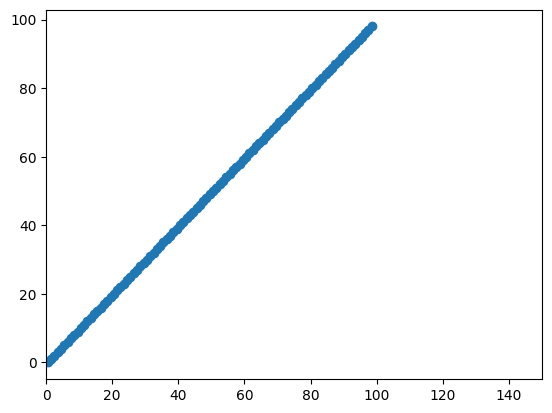

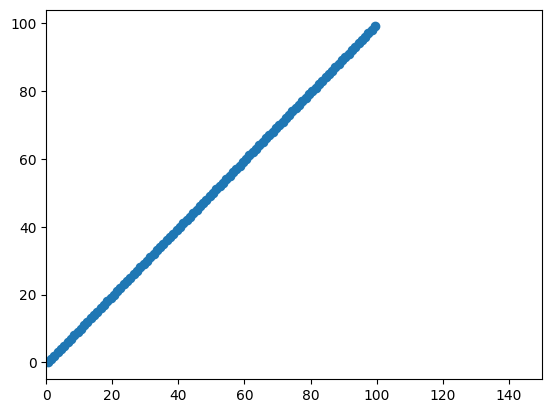

In [ ]:
import numpy as np
X = []
Y = []
X_ = []
for i in range(100):
  X.append(i)
  X_.append(None)
  Y.append(i)


import matplotlib.pyplot as plt

for i in range(100):
  X[i] = X[i] + 0.5


for i in range(100):
  X_[i] = X[i]
  plt.plot(X_, Y, "o--")
  plt.xlim(0,150)
  plt.savefig(f'plot{i}.png')
  plt.show()




In [ ]:
!pip install pillow


In [ ]:

from PIL import Image
import os

image_files = []

for i in range(100):
  image_files.append(f"plot{i}.png")


images = [Image.open(file) for file in image_files]

# Save the images as a GIF
images[0].save('my_plot.gif', save_all=True, append_images=images[1:], duration=500, loop=0)


# Gif para histéresis de glow

In [ ]:
!pip install pillow

In [ ]:
### me interesa sólo el valor de mis resistencias ###

R2 = R2.nominal_value
R3= R3.nominal_value
R4 = R4.nominal_value

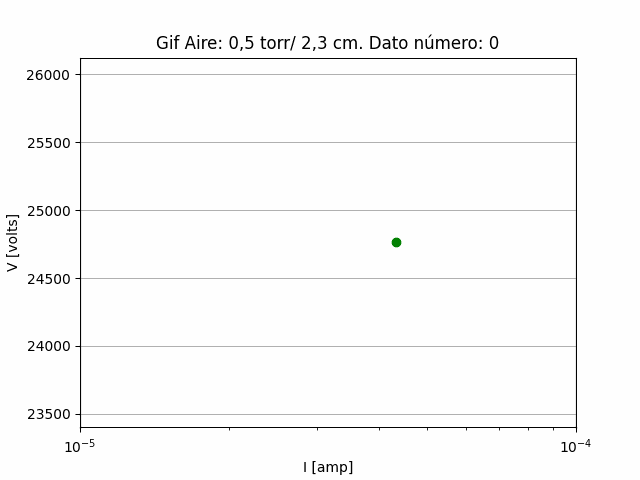

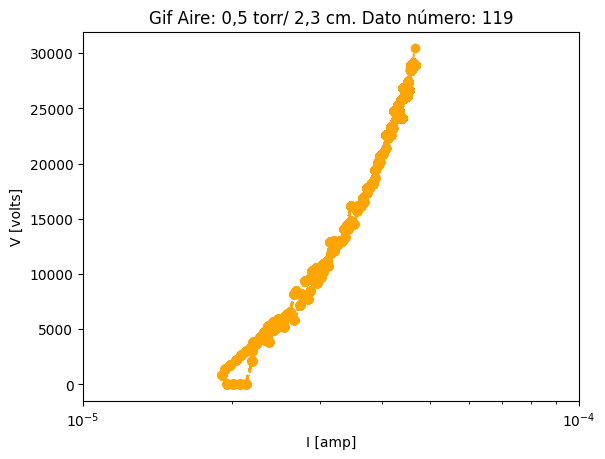

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import pandas as pd


### importar datos como X e Y ###

archivo = "/content/Helio_ p 0.3 _d 4.4 .csv"
ruptura_aprox = 33
p = 0.5
d = 2.3

df = pd.read_csv(archivo)
Vri = df["Vri (mV)"]
Vrv = df["Vrv (mV)"]

col = ["g", "orange"]

Vri_ = []
for i in range(len(Vri)):
  Vri_.append(None)


V = Vrv * (R2 + R3) / R3
I = []

for i in range(len(Vrv)):
  Vri_[i] = np.abs(Vri[i] / R4)
  #Vri_[i] = np.abs(Vri_[i] / R4)
  #Vrv[i] = (Vrv[i] * (R2 + R3) )/ R3

  #I[i] = np.abs(Vri_[i] / R4)
  if i < ruptura_aprox:
    C = col[0]
  else:
    C= col[1]

  plt.plot( Vri_, V, "o--", c=C)
  plt.xlabel(r"I [amp]")
  plt.ylabel(r"V [volts]")
  plt.xlim(1e-5,1e-4)
  plt.xscale("log")
  plt.title(f"Gif Aire: 0,5 torr/ 2,3 cm. Dato número: {i}")
  plt.grid()
  plt.savefig(f'plot{i}.png')


image_files = []

for i in range(len(Vrv)):
  image_files.append(f"plot{i}.png")


images = [Image.open(file) for file in image_files]

images[0].save(f'{archivo}.gif', save_all=True, append_images=images[1:], duration=500, loop=0)

from IPython.display import Image
gif_path = archivo + '.gif'
Image(filename=gif_path)

ValueError: ignored

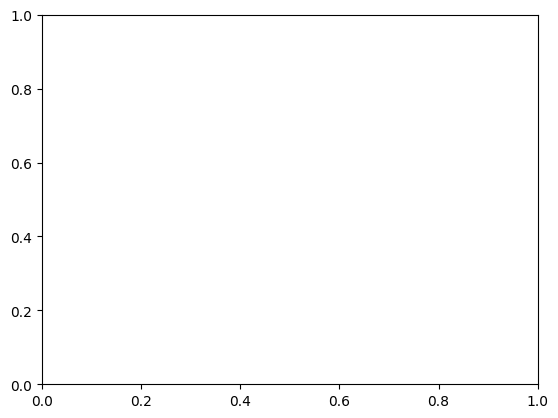

In [ ]:
### Plot final ###

Vri_ = Vri_[30:]

plt.plot( Vri_[:100], V[:100], "o--", c="g")
plt.xlim(1e-12,1)
plt.xscale("log")
plt.title("Ploteo Glow total")
plt.grid()
plt.show()

# Área vs Muestra



In [ ]:
def shoelace_area_from_arrays(x_coords, y_coords):
    x_coords = x_coords + [x_coords[0]]
    y_coords = y_coords + [y_coords[0]]

    n = len(x_coords)
    area = 0
    for i in range(n - 1):
        area += (x_coords[i] * y_coords[i + 1]) - (x_coords[i + 1] * y_coords[i])

    area = abs(area) / 2
    return area

polygon_area = shoelace_area_from_arrays( Vri_[:100], V[:100])
print("The area of the polygon is:", polygon_area)
